In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dxchange
import numpy as np
from convnet.utils import nor_data
from convnet.utils import extract_3d
from convnet.utils import img_window
from convnet.classify import model
import matplotlib.pyplot as plt
import time
import glob

Using Theano backend.
Using gpu device 0: Tesla M2050 (CNMeM is disabled, cuDNN not available)


In [3]:
np.random.seed(1337)

dim_img = 128
patch_size = (dim_img, dim_img)
batch_size = 50
nb_classes = 2
nb_epoch = 12

number of convolutional filters to use

In [4]:
nb_filters = 32

size of pooling area for max pooling

In [5]:
nb_pool = 2

convolution kernel size

In [6]:
nb_conv = 3

In [ ]:
nb_evl = 100

In [7]:
fnames = glob.glob('/local/decarlo/data/databank/xiaogang/center/test_05/Hornby_APS_1000_1058_1/*.tiff')
fnames = np.sort(fnames)

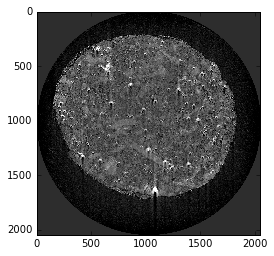

In [8]:
mdl = model(dim_img, nb_filters, nb_conv, nb_classes)

mdl.load_weights('classify_training_weights.h5')

Y_score = np.zeros((len(fnames)))


In [9]:
for i in range(len(fnames)):
    img = dxchange.read_tiff(fnames[i])
    img = nor_data(img)
    X_evl = np.zeros((nb_evl, dim_img, dim_img))

    for j in range(nb_evl):
        X_evl[j] = img_window(img[360:1460, 440:1440], dim_img)
    X_evl = X_evl.reshape(X_evl.shape[0], 1, dim_img, dim_img)
    Y_evl = mdl.predict(X_evl, batch_size=batch_size)
    Y_score[i] = sum(np.dot(Y_evl, [0, 1]))

In [10]:
ind_max = np.argmax(Y_score)
print('The well-centered reconstruction is:', fnames[ind_max])
print('The prediction runs for %s seconds'%(time.time()-start_time))
plt.plot(Y_score)
plt.show()